In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

from tqdm import tqdm
from copy import deepcopy
from matplotlib import cm
from sklearn import mixture
from matplotlib import dates
from sklearn import preprocessing
from arch.univariate import arch_model

In [2]:
sns.set()
sns.mpl.rcParams['figure.figsize'] = (25.0, 10.0)
sns.mpl.rcParams['savefig.dpi'] = 90
sns.mpl.rcParams['font.family'] = 'sans-serif'
sns.mpl.rcParams['font.size'] = 14

In [8]:
df_data = pd.read_csv(r'/home/brainiac/Vlad/Jupyter Notebooks/DataSets/2019_2020_t1000_BRAINIAC.csv')

In [149]:
def get_bsadf(logP, minSL, constant, lags):
    y, x=getYX(logP, constant=constant, lags=lags)
    startPoints, bsadf, allADF=range(0, y.shape[0]+lags-minSL+1), 0, []
    for start in startPoints:
        y_, x_=y[start:], x[start:]
        bMean_, bStd_=getBetas(y_, x_)
        bMean_, bStd_=bMean_[0,0], bStd_[0,0]**.5
        allADF.append(bMean_/bStd_)
        if allADF[-1]>bsadf:
            bsadf=allADF[-1]
    out={'Time':logP.index[-1], 'gsadf':bsadf}
    return out

In [94]:
def getYX(series,constant,lags):
    series_=series.diff().dropna()
    x=lagDF(series_,lags).dropna()
    x.iloc[:, 0]=series.values[-x.shape[0]-1:-1, 0] # lagged level
    y=series_.iloc[-x.shape[0]:].values
    if constant!='nc':
        x=np.append(x,np.ones((x.shape[0],1)),axis=1)
        if constant[:2]=='ct':
            trend=np.arange(x.shape[0]).reshape(-1,1)
            x=np.append(x, trend, axis=1)
        if constant=='ctt':
            x=np.append(x, trend**2, axis=1)
    return y,x

In [95]:
def lagDF(df0,lags):
    df1=pd.DataFrame()
    if isinstance(lags,int):
        lags=range(lags+1)
    else:
        lags=[int(lag) for lag in lags]
    for lag in lags:
        df_=df0.shift(lag).copy(deep=True)
        df_.columns=[str(i)+'_'+str(lag) for i in df_.columns]
        df1=df1.join(df_,how='outer')
    return df1

In [96]:
def getBetas(y,x):
    xy=np.dot(x.T,y)
    xx=np.dot(x.T,x)
    xxinv=np.linalg.inv(xx)
    bMean=np.dot(xxinv,xy)
    err=y-np.dot(x,bMean)
    bVar=np.dot(err.T,err)/(x.shape[0]-x.shape[1])*xxinv
    return bMean, bVar

In [262]:
series = df_data[['close']]
X = series
X_l = log(X)

In [270]:
get_bsadf(logP=X_l[3300:3500], minSL=199, constant='nc', lags=10)

{'Time': 3499, 'gsadf': 1.4335593526593164}

In [157]:
X_l[0:500].values

array([[8.21297515],
       [8.2131107 ],
       [8.21378816],
       [8.21527696],
       [8.21460051],
       [8.21568261],
       [8.2160881 ],
       [8.21689858],
       [8.21487114],
       [8.21419441],
       [8.21338174],
       [8.2136527 ],
       [8.212704  ],
       [8.21351723],
       [8.21189011],
       [8.21026034],
       [8.21053215],
       [8.21093973],
       [8.21161867],
       [8.21121136],
       [8.20998845],
       [8.20781069],
       [8.20917235],
       [8.20917235],
       [8.20971649],
       [8.20985248],
       [8.20876405],
       [8.21053215],
       [8.21053215],
       [8.2117544 ],
       [8.21229714],
       [8.21216148],
       [8.21121136],
       [8.2120258 ],
       [8.2125684 ],
       [8.21338174],
       [8.21500643],
       [8.21419441],
       [8.2139236 ],
       [8.2136527 ],
       [8.21243278],
       [8.2117544 ],
       [8.2117544 ],
       [8.21216148],
       [8.21338174],
       [8.2131107 ],
       [8.212704  ],
       [8.213

In [235]:
left = 20_000
right = 30_000

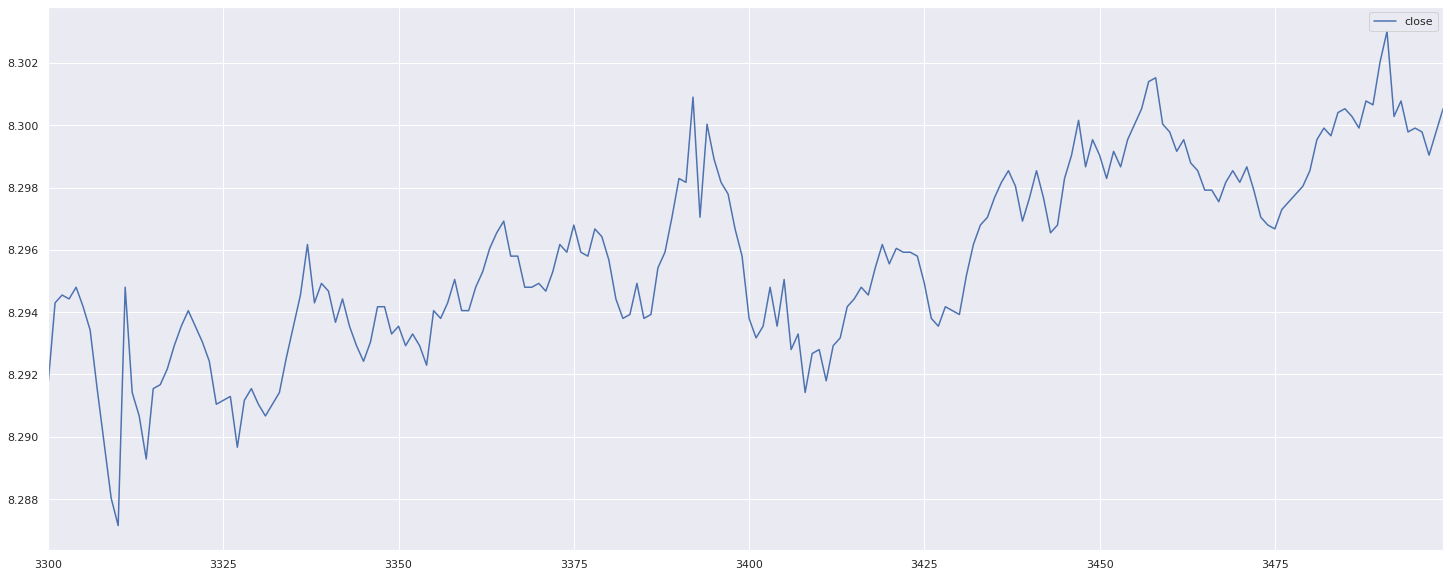

In [264]:
pd.DataFrame(X_l[3300:3500]).plot()

In [261]:
result = adfuller(X_l[3300:4_000])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.784915
p-value: 0.823513


In [277]:
series = df_data['close']
X = series.values
X_l = log(X)

fuller_list = []
for i in range(1_000, 250_000, 1_000):
    result = adfuller(X_l[0:i])
    fuller_list.append(result[1])

In [278]:
fuller_list

[0.5145726376487881,
 0.12064805079803076,
 0.5177267832274368,
 0.7194109589183424,
 0.6689313381204026,
 0.671945420720879,
 0.6949930943259935,
 0.6118600929429758,
 0.6341955065328391,
 0.6963417526101485,
 0.7120343146543213,
 0.7035459594014604,
 0.5281554341535861,
 0.48665624953505604,
 0.5221641271946718,
 0.5942314180249417,
 0.5986602973193323,
 0.45331389159172963,
 0.4320660832626668,
 0.3958752589061897,
 0.4157698521316129,
 0.4217395361413897,
 0.3711407857352851,
 0.40701072894515783,
 0.4891158241913591,
 0.3602142053730243,
 0.4994576478994674,
 0.9436129433486641,
 0.9589992450913827,
 0.9467776580016559,
 0.9383937092767018,
 0.9578704514861608,
 0.9498321557530446,
 0.9067055424168238,
 0.8995805241404855,
 0.9301645089037117,
 0.9317580468523,
 0.9346691495662769,
 0.9368877907914654,
 0.8699320293340891,
 0.8578076638008336,
 0.8943290207014127,
 0.9387957204633296,
 0.9270368959286867,
 0.923296415985302,
 0.9210380728757512,
 0.946101517735321,
 0.959125662273

In [125]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
series = df_data['close']

In [126]:
X = series.values
X_l = log(X)

In [127]:
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

KeyboardInterrupt: 

In [73]:
result = adfuller(X_l)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.224604
p-value: 0.197437
	1%: -3.430
	5%: -2.862
	10%: -2.567


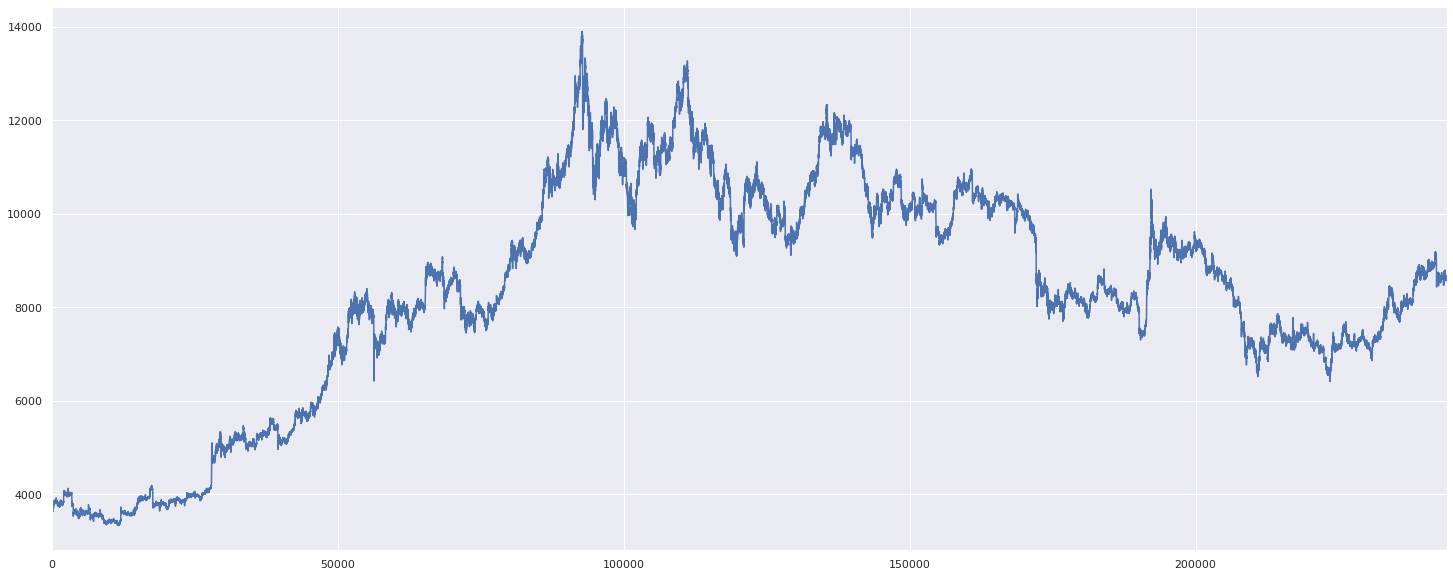

In [83]:
series.plot()

In [88]:
result = adfuller(eries.values[0:3000])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.531794
p-value: 0.517729
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [85]:
series.values[0:3000]

array([3688.5, 3689. , 3691.5, ..., 4002.5, 4001.5, 3997. ])